In [1]:
try:
    %load_ext autotime
except:
    !pip install ipython-autotime
    %load_ext autotime

time: 190 µs (started: 2021-08-29 20:02:12 +08:00)


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import load_wine, fetch_20newsgroups, load_boston
from numpy.testing import assert_equal, assert_array_almost_equal

time: 1.22 s (started: 2021-08-29 20:02:12 +08:00)


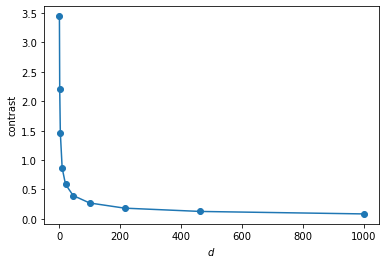

time: 1.22 s (started: 2021-08-29 20:02:13 +08:00)


In [3]:
# make datapoints
ds = np.logspace(0, 3, 10).astype(int)

contrasts = []

for d in ds:
    # compute the distance of each d in ds vs a random point
    distances = [euclidean(np.zeros(d), np.random.random(d)) for _ in range(10_000)]
    contrasts.append(6*np.std(distances) / np.mean(distances))

# plot the contrast for each different value of d
fig, ax = plt.subplots()
ax.plot(ds, contrasts, '-o')
ax.set_xlabel('$d$')
ax.set_ylabel('contrast');

higher dimension d makes euclidean distance higher, which makes it harder to distinguish different classes.

# PCA Pipeline

## load the data (wine dataset)

In [4]:
from sklearn.datasets import load_wine

wine = load_wine()
wine.keys()
wine['data']
print(wine['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

## scale the data

In [5]:
# center the data
X = np.array(wine.data)
X_scaled = (X - X.mean(axis=0)) / X.std(axis=0)

# you can also scale using standard scaler
data_wine = load_wine()
standard_scaler = StandardScaler()
X_scaled = standard_scaler.fit_transform(data_wine['data'])

time: 2.54 ms (started: 2021-08-29 20:02:15 +08:00)


## PCA from scratch using python

In [6]:
def pca(X):
    """Compute the PCA and return the rotated design matrix, 
    the weights and the variance explained. 
    
    PARAMETERS
    ----------
    X : array with columns as features and rows as the observations
    
    RETURNS
    -------
    X_new : rotated design matrix
    W: weight, transformation matrix
    variance_explained: the percentage of variance accounted for
    by each component
    
    """
    #center the data
    scaled_X = (X - X.mean(axis=0))
    
    #get the covariance matrix
    covariance_matrix = np.cov(scaled_X, rowvar=False)

    # Get Eigen Vectors and Eigen Values
    eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

    # Get index sorting key based on Eigen Values
    sorted_key = np.argsort(eigen_values)[::-1]
    
    # Get num_components of Eigen Values and Eigen Vectors
    eigen_values, eigen_vectors = eigen_values[sorted_key], eigen_vectors[:, sorted_key]

    # Dot product of original data and eigen_vectors are the principal 
    #component values
    # This is the "projection" step of the original points on to the 
    #Principal Component
    principal_components=np.dot(scaled_X,eigen_vectors)

    w = eigen_vectors
    X_new = principal_components
    variance_explained = eigen_values/np.sum(eigen_values)
    return (X_new, w, variance_explained)

time: 357 µs (started: 2021-08-29 20:02:15 +08:00)


## perform PCA using sklearn

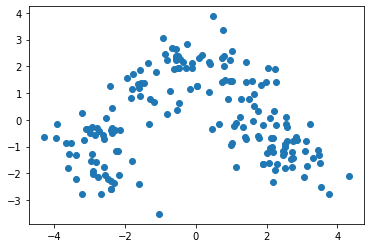

time: 127 ms (started: 2021-08-29 20:02:15 +08:00)


In [7]:
# Perform PCA using sklearn
from sklearn.decomposition import PCA

# make an instance of the model
pca = PCA(n_components=10)

# fit and transform the points, apply dimensionality reduction to X
X_new = pca.fit_transform(X_scaled)

# plot the first two PCs
plt.scatter(X_new[:,0], X_new[:,1]);

## plot the variance explained

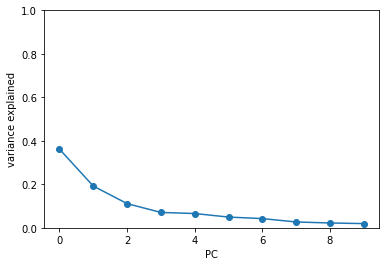

time: 61 ms (started: 2021-08-29 20:02:15 +08:00)


In [8]:
# plot the explained variance

pca.explained_variance_ratio_
plt.plot(range(10), pca.explained_variance_ratio_, 'o-')
plt.ylim(0,1)
plt.xlabel('PC')
plt.ylabel('variance explained');

## plot the cumulative variance explained

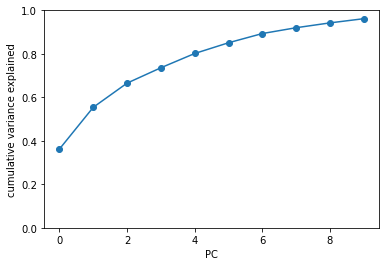

time: 62 ms (started: 2021-08-29 20:02:15 +08:00)


In [9]:
exp_var = pca.explained_variance_ratio_.cumsum()
exp_var_cum = pca.explained_variance_ratio_

plt.plot(range(10), pca.explained_variance_ratio_.cumsum(), 'o-')
plt.ylim(0,1)
plt.xlabel('PC')
plt.ylabel('cumulative variance explained');

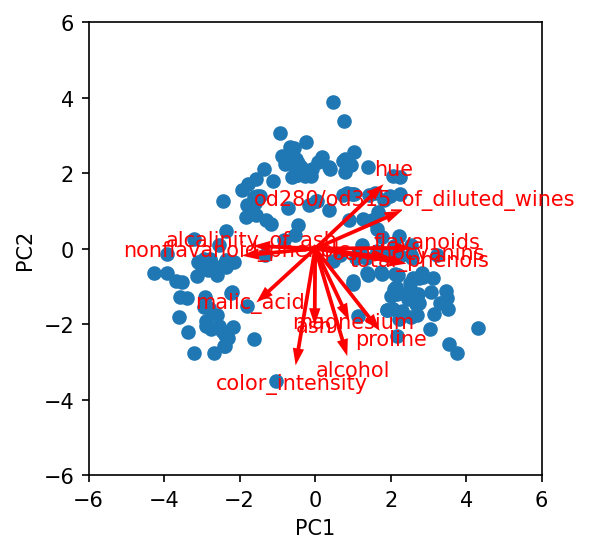

time: 107 ms (started: 2021-08-29 20:02:15 +08:00)


In [10]:
fig, ax = plt.subplots(1, 1, subplot_kw=dict(aspect='equal'), dpi=150)

# plot the transformed points PC1 and PC2
ax.scatter(X_new[:,0], X_new[:,1])
features = np.array(wine.feature_names)

# this function gives the eigenvectors
w = pca.components_.T

# plot the features as arrows
for feature, vec in zip(features, w):
    ax.arrow(0, 0, 5*vec[0], 5*vec[1], width=0.1, ec='none', fc='r')
    ax.text(7*vec[0], 7*vec[1], feature, ha='center', color='r')
ax.set_xlim(-6, 6)
ax.set_ylim(-6, 6)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2');

Interpret using the following concepts:

* **Coordinates**: What do the directions of each PC mean? Use the general direction of the transformed dimensions as a guide.
* **Correlations**: Which groups of transformed dimensions point toward the same direction? Which are opposite to each other? These suggest correlation or anticorrelation.
* **Clusters**: Which points clump together?
* **Funnels**: Are there points that are wide on one side and narrow on the other? This suggest dependence of principal components.
* **Voids**: Are there unusually unpopulated areas? This suggests certain combinations of values are unlikely to occur.

# SVD Pipeline

SVD decomposes an $n \times d$ matrix $\mathbf D$ into $\mathbf{D}=\mathbf{Q\Sigma P}^T$ where
* $\mathbf{Q}$ is an $n \times n$ matrix of orthonormal columns (left singular vectors)
* $\mathbf{\Sigma}$ is an $n \times d$ diagonal matrix of singular values
* $\mathbf{P}$ is a $d \times d$ matrix of orthonormal columns (right singular vectors).


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston, fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from numpy.testing import assert_equal, assert_array_almost_equal

time: 237 µs (started: 2021-08-29 20:02:15 +08:00)


## Truncated SVD from scratch using Python

In [12]:
def truncated_svd(X):
    """Return the truncated svd
    
    PARAMETERS
    ----------
    X: array where columns are features and rows are observations
    
    RETURNS
    -------
    q, s, p, nssd: array
    nssd: normalized sum of squared distance from the origin
    """
    
    q, s, p = np.linalg.svd(X)
    sigma = np.diag(s)
    nssd = s**2/sum(s**2)
    return q, sigma, p.T, nssd

time: 225 µs (started: 2021-08-29 20:02:15 +08:00)


In [13]:
# apply python version of truncated svd (note that svd doesnt need data to 
#be scaled, but its scaled here just to be able to compare to PCA)

q, s, p, nssd = truncated_svd(X_scaled)

time: 6.25 ms (started: 2021-08-29 20:02:15 +08:00)


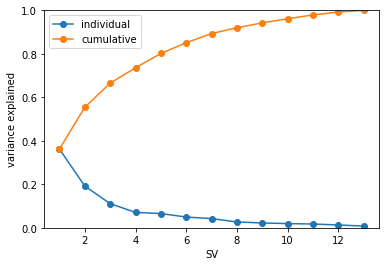

time: 115 ms (started: 2021-08-29 20:02:15 +08:00)


In [14]:
fig, ax = plt.subplots()
ax.plot(range(1, len(nssd)+1), nssd, 'o-', label='individual')
ax.plot(range(1, len(nssd)+1), nssd.cumsum(), 'o-', label='cumulative')
ax.legend()
ax.set_ylim(0, 1)
ax.set_xlabel('SV')
ax.set_ylabel('variance explained');

In [15]:
def plot_svd(X_new, features, p):
    """
    Plot transformed data and features on to the first two singular vectors
    
    Parameters
    ----------
    X_new : array
        Transformed data
    featurs : sequence of str
        Feature names
    p : array
        P matrix
    """
    fig, ax = plt.subplots(1, 2, subplot_kw=dict(aspect='equal'), 
                           gridspec_kw=dict(wspace=0.4), dpi=150)
    ax[0].scatter(X_new[:,0], X_new[:,1])
    ax[0].set_xlabel('SV1')
    ax[0].set_ylabel('SV2')

    for feature, vec in zip(features, p):
        ax[1].arrow(0, 0, vec[0], vec[1], width=0.01, ec='none', fc='r')
        ax[1].text(vec[0], vec[1], feature, ha='center', color='r', fontsize=5)
    ax[1].set_xlim(-1, 1)
    ax[1].set_ylim(-1, 1)
    ax[1].set_xlabel('SV1')
    ax[1].set_ylabel('SV2')

time: 476 µs (started: 2021-08-29 20:02:15 +08:00)


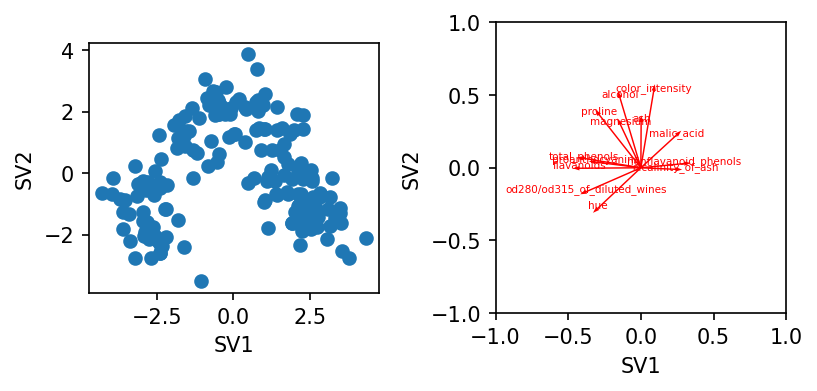

time: 144 ms (started: 2021-08-29 20:02:15 +08:00)


In [16]:
plot_svd(X_new, features, p)

## Latent Semantic Analysis (SVD for text)

## load the newsgroups dataset

In [17]:
data_newsgroups = fetch_20newsgroups(
    subset='train', 
    categories=['comp.graphics', 'rec.autos'],
    shuffle=False, 
    remove=['headers', 'footers', 'quotes'])
X_ng = data_newsgroups['data']
print('length of the newsgroup:', len(X_ng))

length of the newsgroup: 1178
time: 1.07 s (started: 2021-08-29 20:02:15 +08:00)


## make Bag of Words rep and TFIDF

In [18]:
# make an instance of the Tfidf vectorizer
tfidf_vectorizer = TfidfVectorizer(token_pattern=r'[a-z-]+', 
                                   stop_words='english',
                                   min_df=5)

# make bag of words representation using tfidf
bow_ng = tfidf_vectorizer.fit_transform(data_newsgroups['data'])
print('bow_ng tfidf shape', bow_ng.shape)

# get all the nonzero values in the bow_ng sparse matrix
nonzeros = bow_ng.sum(axis=1).nonzero()[0]

# bow_ng is the features, target_ng is the target
bow_ng = bow_ng[nonzeros]
target_ng = data_newsgroups['target'][nonzeros]

print('bow_ng nonzeros shape', bow_ng.shape)
print('target_ng nonzeros shape', target_ng.shape)

bow_ng tfidf shape (1178, 2470)
bow_ng nonzeros shape (1128, 2470)
target_ng nonzeros shape (1128,)
time: 85.2 ms (started: 2021-08-29 20:02:16 +08:00)


## perform SVD

In [19]:
q_ng, s_ng, p_ng, nssd_ng = truncated_svd(bow_ng.toarray())

time: 1.07 s (started: 2021-08-29 20:02:16 +08:00)


## plot the variance explained

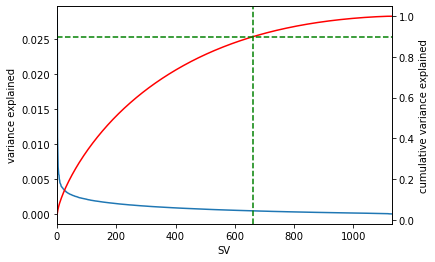

time: 106 ms (started: 2021-08-29 20:02:17 +08:00)


In [20]:
fig, ax = plt.subplots()
ax.plot(range(1, len(nssd_ng)+1), nssd_ng, '-', label='individual')
ax.set_xlim(0, len(nssd_ng)+1)
ax.set_xlabel('SV')
ax.set_ylabel('variance explained')
ax = ax.twinx()
ax.plot(range(1, len(nssd_ng)+1), nssd_ng.cumsum(), 'r-', label='cumulative')
ax.axhline(0.9, ls='--', color='g')
ax.axvline(662, ls='--', color='g')
ax.set_ylabel('cumulative variance explained');

# 662 was hard-coded to show the cumulative variance explained at 662 singular
# vectors is about 90%.

## plot the weights for each of the singular vectors

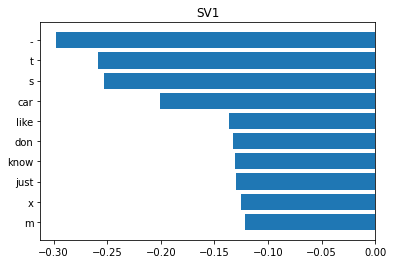

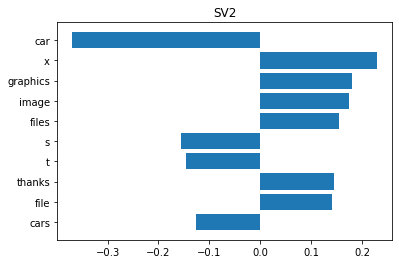

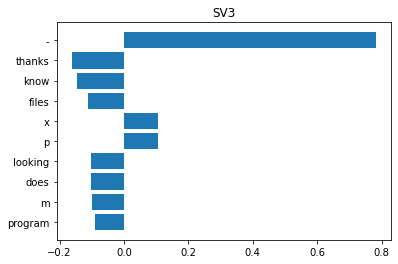

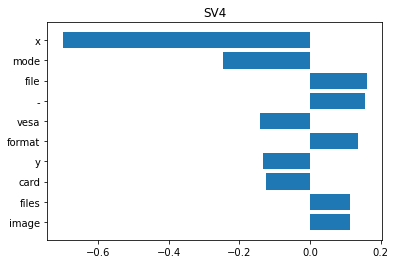

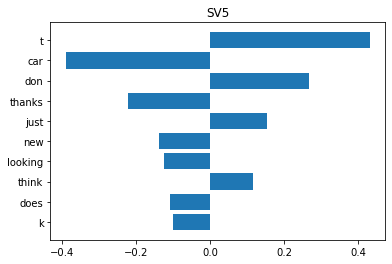

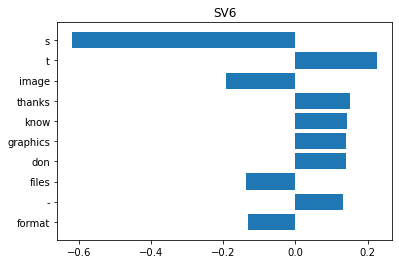

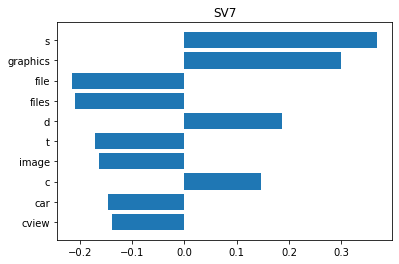

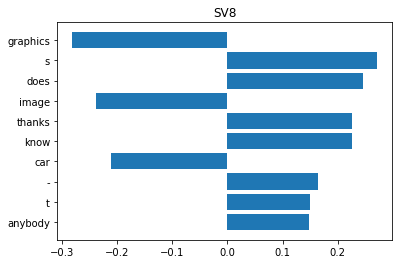

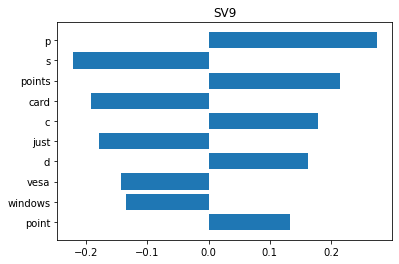

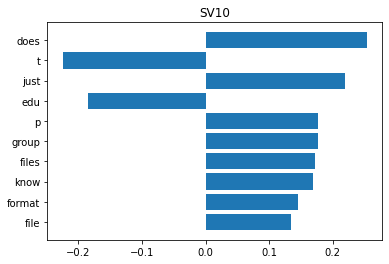

time: 665 ms (started: 2021-08-29 20:02:18 +08:00)


In [21]:
feature_names = tfidf_vectorizer.get_feature_names()

# plot the 10 singular vectors, this can be the basis for the topics
for i in range(10):
    fig, ax = plt.subplots()
    order = np.argsort(np.abs(p_ng[:, i]))[-10:]
    ax.barh([feature_names[o] for o in order], p_ng[order, i])
    ax.set_title(f'SV{i+1}')

# NMF Pipeline

Let $\mathbf D$ be our $n \times d$ design matrix. In NMF, we want to decompose it into $\mathbf{D} = \mathbf{UV}^T$ 

* D is the bag of words matrix (resulting from TFIDF such as bow_ng above)
* U is the latent factors (or topics) and the values are the affinity of each object(document) to the latent factor - these are the weights
* columns of V are the latent factors and the rows are the affinity of each original dimension to the latent factor

In [22]:
# check the shape
print('bow_ng shape:', bow_ng.shape)

# check whats the diff between toarray() and to_dense
array = bow_ng.toarray()
dense = bow_ng.todense()
check = array != dense
print('no of elements different in toarray() and todense:', check.sum())

array

bow_ng shape: (1128, 2470)
no of elements different in toarray() and todense: 0


array([[0.19822006, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

time: 11.6 ms (started: 2021-08-29 20:02:18 +08:00)


## perform NMF

In [23]:
from sklearn.decomposition import NMF

nmf = NMF(n_components = 10)
U = nmf.fit_transform(bow_ng.toarray()) # this is the weight
V = nmf.components_.T # these are the latent factors

/Users/kash/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


time: 607 ms (started: 2021-08-29 20:02:18 +08:00)


In [24]:
U

array([[0.        , 0.00350729, 0.11971539, ..., 0.        , 0.        ,
        0.        ],
       [0.08146091, 0.0294271 , 0.        , ..., 0.        , 0.00996864,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.00292277, 0.        , ..., 0.16597126, 0.01793416,
        0.        ],
       [0.01950781, 0.01329033, 0.01574769, ..., 0.        , 0.        ,
        0.01295007],
       [0.00281757, 0.        , 0.        , ..., 0.        , 0.        ,
        0.00894491]])

time: 1.48 ms (started: 2021-08-29 20:02:19 +08:00)


In [25]:
V

array([[0.00000000e+00, 0.00000000e+00, 1.55716382e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [8.29177181e-02, 1.56254256e-01, 1.03018837e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.20180024e-02, 5.27899767e-03, 8.68183596e-03, ...,
        5.39891563e-03, 2.95568419e-02, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 1.66290901e-02, ...,
        1.21842218e-02, 1.55381249e-01, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 9.15302297e-04, ...,
        0.00000000e+00, 2.82769601e-03, 0.00000000e+00],
       [0.00000000e+00, 1.90062206e-03, 1.80764306e-03, ...,
        8.08150624e-02, 0.00000000e+00, 0.00000000e+00]])

time: 1.99 ms (started: 2021-08-29 20:02:19 +08:00)


## plot the latent factors

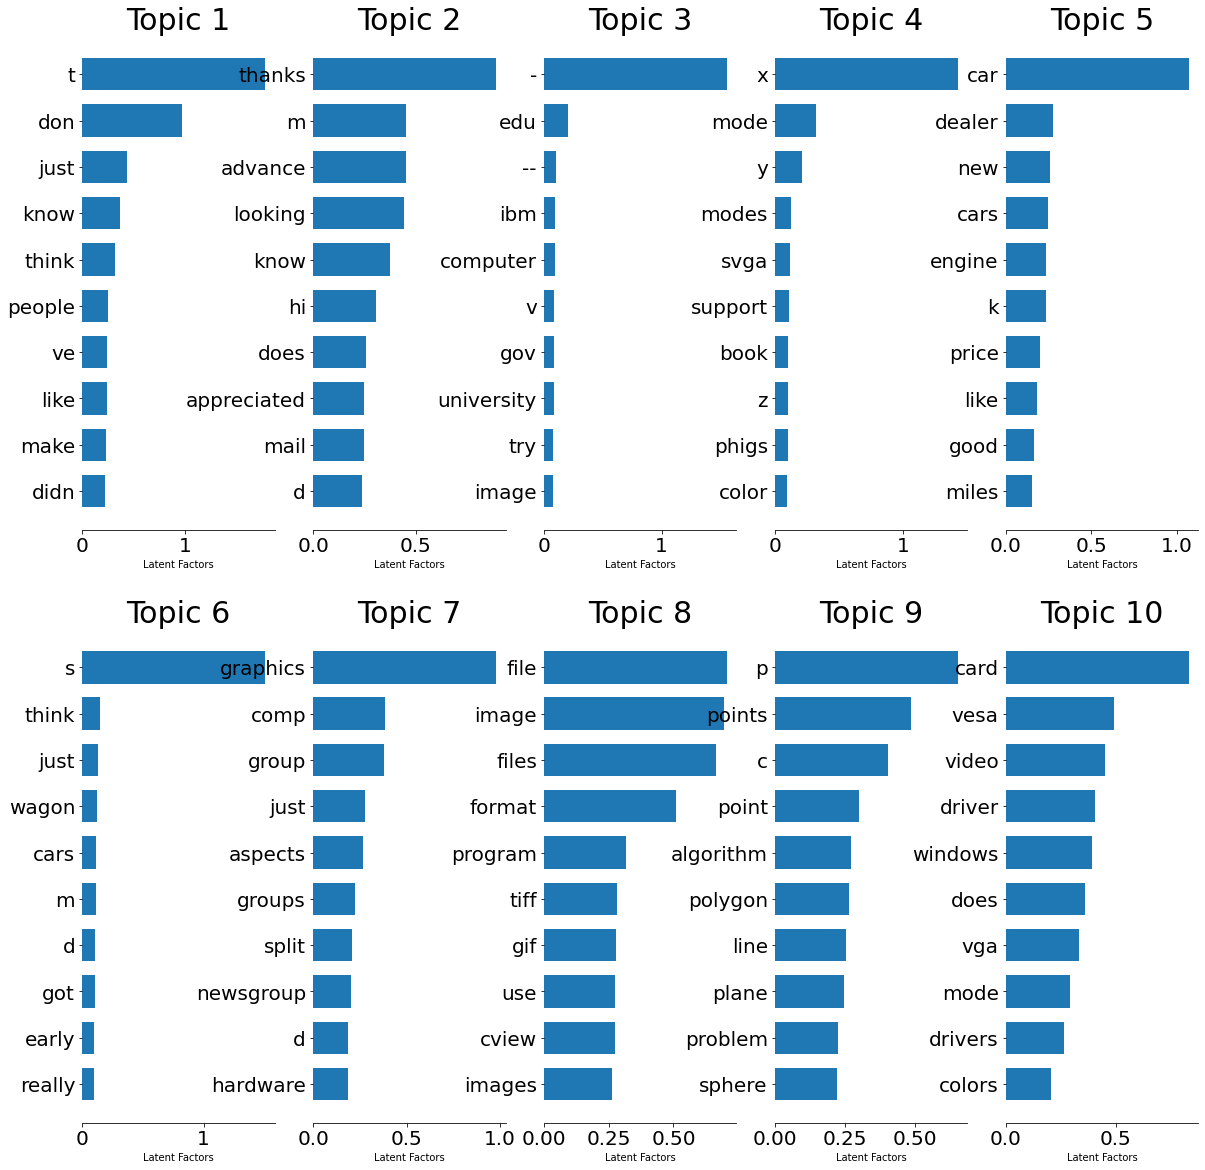

time: 769 ms (started: 2021-08-29 20:02:19 +08:00)


In [26]:
# plot the latent factors 

fig, axes = plt.subplots(2, 5,
                         figsize=(20,20), sharex=False)
axes = axes.flatten()

for topic_idx, topic in enumerate(nmf.components_):
    top_features_ind = topic.argsort()[:-10 - 1:-1]
    top_features = [feature_names[i] for i in top_features_ind]
    weights = topic[top_features_ind]

    ax = axes[topic_idx]
    ax.barh(top_features, weights, height=0.7)
    ax.set_title(f'Topic {topic_idx +1}',
                 fontdict={'fontsize': 30})

    ax.invert_yaxis()
    ax.tick_params(axis='both', which='major', labelsize=20)
    for i in 'top right left'.split():
        ax.spines[i].set_visible(False)
#     fig.suptitle(title, fontsize=40)
    ax.set_xlabel('Latent Factors')